# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - ANAHUAC
### Solución Luis Marquez

### Introducción

En este desafio, usted usará herramientas de IBM como Watson Studio (o Cloud Pak for Data) para construir un modelo baseado en Machine Learning capaz de preveer si un estudante irá continuar o abandonará su curso.

### En este notebook, está parte del codigo proporcionado por los organizadores de la maraton, junto a todas mis adiciones, comentarios y analisis personales.

<hr>

## Installing Libs

In [1]:
!pip install scikit-learn --upgrade
!pip install seaborn --upgrade

Requirement already up-to-date: scikit-learn in c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages (0.23.2)


You should consider upgrading via the 'c:\users\luis marquez\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


Requirement already up-to-date: seaborn in c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages (0.11.0)

You should consider upgrading via the 'c:\users\luis marquez\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


<hr>

## Loading the .csv dataset from GitHub
### Hay 4 tablas de datos proporcionadas para hacer el modelo

In [2]:
import requests
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from collections import Counter

In [3]:
url = 'https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv'
filename = 'ForTraining.csv'
urllib.request.urlretrieve(url, filename)

df_base_for_training = pd.read_csv(r'ForTraining.csv')
df_base_for_training.head()

,studentId,reducido,ciclo,Graduado
0,88588.0,Interv. Edu.,2019 - 08,No
1,81135.0,Educacion,2019 - 05,Si
2,80926.0,Direc. Estrat. Neg,2019 - 05,Si
3,82415.0,B. I.,2019 - 06,Si
4,90082.0,Est. Temprana,2019 - 08,No


Descripción: La primera tabla mostrada arriba tiene 4 columnas, 3 son features y el target: `Graduado` tiene valor binarios={Si, No}.

In [4]:
url = 'https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv'
filename = 'OrdenMaterias.csv'
urllib.request.urlretrieve(url, filename)

df_orden_materias = pd.read_csv(r'OrdenMaterias.csv')
df_orden_materias.head()
#esta tiene el orden de materias cursadas por periodo segun el reducido

,reducido,2017 - 03,2017 - 04,2017 - 05,2017 - 06,2017 - 07,2017 - 08,2018 - 01,2018 - 02,2018 - 03,...,2019 - 05,2019 - 06,2019 - 07,2019 - 08,2020 - 01,2020 - 02,2020 - 03,2020 - 04,2020 - 05,2020 - 06
0,Act. Derecho Contratual,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Sin clase,Sin clase,Consentimiento y objeto digital contractual,Métodos alternos de resolución de controversias,Nueva clasificación contractual,Nuevo derecho probatorio documental,Contratos inteligentes,Consentimiento y objeto digital contractual
1,Adm. Emp.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...
2,Adm. Riesgos,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones
3,Adm. Salud,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Calidad en salud,Contabilidad Financiera y Presupuestos,Administración de costos,Salud pública,Planeación estratégica en salud,Calidad en salud,Contabilidad Financiera y Presupuestos,Planeación estratégica en salud,Salud pública,Planeación estratégica en salud
4,Admon Fin.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...


In [5]:
url = 'https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv'
filename = 'TablaConexiones.csv'
urllib.request.urlretrieve(url, filename)

df_tabla_conexiones = pd.read_csv(r'TablaConexiones.csv')
df_tabla_conexiones.head()
#en esta estan los datos de conexion segun el Id de estudiante

,studentId,ciclo,Dias_Conectado,Minutos_Promedio,Minutos_Total
0,45870,2017 - 03,10.0,76.957000,769.57
1,45898,2017 - 03,32.0,370.231250,11847.40
2,45905,2017 - 03,50.0,198.717400,9935.87
3,45931,2017 - 03,22.0,294.535909,6479.79
4,45933,2017 - 03,18.0,177.991667,3203.85


In [6]:
url = 'https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv'
filename = 'TablaTareas.csv'
urllib.request.urlretrieve(url, filename)

df_tabla_tareas = pd.read_csv(r'TablaTareas.csv')
df_tabla_tareas.head()
#y en esta ultima estan los datos de calificaciones y tareas segun el ID

,studentId,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
0,81328.0,2019 - 05,99.000000,10.0,0.0,0.0,10.0
1,99206.0,2020 - 02,80.777500,10.0,2.0,0.0,12.0
2,94582.0,2020 - 01,79.666000,10.0,0.0,0.0,10.0
3,87564.0,2019 - 07,0.000000,0.0,15.0,0.0,15.0
4,87971.0,2019 - 08,36.363636,5.0,6.0,0.0,11.0


Overview del Dataset:

    Disponibles para el participante, ecisten 4 tables cargas en DataFrames anteriormente:
    
    **df_base_for_training**
        - ``studentId``
        ``reducido``
        ``ciclo``
        ``Graduado`` --> ¡LA VARIABLE OBJETIVO PARA CLASIFICACIÓN BINARIA!
        
    **df_orden_materias**
        ``reducido``
        ``2017 - 03``
        ``2017 - 04``
        ``2017 - 05``
        ``2017 - 06``
        ``2017 - 07``
        ``2017 - 08``
        ``2018 - 01``
        ``2018 - 02``
        ``2018 - 03``
        ``2018 - 04``
        ``2018 - 05``
        ``2018 - 06``
        ``2018 - 07``
        ``2018 - 08``
        ``2019 - 01``
        ``2019 - 02``
        ``2019 - 03``
        ``2019 - 04``
        ``2019 - 05``
        ``2019 - 06``
        ``2019 - 07``
        ``2019 - 08``
        ``2020 - 01``
        ``2020 - 02``
        ``2020 - 03``
        ``2020 - 04``
        ``2020 - 05``
        ``2020 - 06``
        
    **df_tabla_conexiones**
        - ``studentId``
        ``ciclo``
        ``Dias_Conectado``
        ``Minutos_Promedio``
        ``Minutos_Total``
        
    **df_tabla_tareas**
        - ``studentId``
        ``ciclo``
        ``Calificacion_Promedio``
        ``Tareas_Puntuales``
        ``Tareas_No_Entregadas``
        ``Tareas_Retrasadas``
        ``Total_Tareas``
        

In [7]:
print("Columnas en *df_base_for_training*:")
print(df_base_for_training.columns)

print("\Columnas en *df_orden_materias*:")
print(df_orden_materias.columns)

print("\Columnas en *df_tabla_conexiones*:")
print(df_tabla_conexiones.columns)

print("\Columnas en *df_tabla_tareas*:")
print(df_tabla_tareas.columns)

Columnas en *df_base_for_training*:
Index(['studentId', 'reducido', 'ciclo', 'Graduado'], dtype='object')
\Columnas en *df_orden_materias*:
Index(['reducido', '2017 - 03', '2017 - 04', '2017 - 05', '2017 - 06',
       '2017 - 07', '2017 - 08', '2018 - 01', '2018 - 02', '2018 - 03',
       '2018 - 04', '2018 - 05', '2018 - 06', '2018 - 07', '2018 - 08',
       '2019 - 01', '2019 - 02', '2019 - 03', '2019 - 04', '2019 - 05',
       '2019 - 06', '2019 - 07', '2019 - 08', '2020 - 01', '2020 - 02',
       '2020 - 03', '2020 - 04', '2020 - 05', '2020 - 06'],
      dtype='object')
\Columnas en *df_tabla_conexiones*:
Index(['studentId', 'ciclo', 'Dias_Conectado', 'Minutos_Promedio',
       'Minutos_Total'],
      dtype='object')
\Columnas en *df_tabla_tareas*:
Index(['studentId', 'ciclo', 'Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas'],
      dtype='object')


#### ¡ATENCIÓN! La columna **target** es  ``Graduado``, presente en el DataFrame "df_base_for_training".

<hr>

## Uniendo DataFrames en Pandas

Para comenzar unimos las diferentes tablas en una sola. en la primera se encuentra la variable objetivo pareada con los estudent ID, por lo que utilizaremos esos IDs como llave para unir a las otras tablas, de manera de solo complementar los datos de esos estudiantes que ya tienen una clasificacion como graduados o no.
Por otro lado la tabla de Orden de Materias la utilizaremos de otra forma

In [8]:
df_base_for_training.tail()
df_base_for_training.sort_values(by=['studentId'])

,studentId,reducido,ciclo,Graduado
379,45898.0,Mercadotecnia,2017 - 03,Si
2471,45905.0,Intro. Fin,2017 - 03,No
1880,45931.0,Direc. Proy.,2017 - 03,No
2112,46063.0,Comp. Dig. Docentes,2017 - 03,Si
1937,46106.0,Gest. Esc.,2017 - 03,Si
...,...,...,...,...
1091,91320.0,Adm. Emp.,2019 - 08,No
513,91330.0,I. A.,2019 - 08,Si
1991,91331.0,Gest. Esc.,2019 - 08,No
395,91335.0,Gest. Esc.,2019 - 08,Si


In [9]:
df_tabla_tareas.tail()
df_tabla_tareas.sort_values(by=['studentId'])

,studentId,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
2434,45870.0,2017 - 03,6.666667,1.0,8.0,0.0,9.0
1483,45898.0,2017 - 03,65.598667,13.0,2.0,0.0,15.0
5394,45905.0,2017 - 03,86.482222,9.0,0.0,0.0,9.0
2528,45931.0,2017 - 03,63.196667,12.0,2.0,1.0,15.0
5674,45933.0,2017 - 03,71.008667,13.0,2.0,0.0,15.0
...,...,...,...,...,...,...,...
3427,102572.0,2020 - 02,90.302727,11.0,0.0,0.0,11.0
5518,102576.0,2020 - 02,82.857143,14.0,0.0,0.0,14.0
1351,102578.0,2020 - 02,30.588235,6.0,11.0,0.0,17.0
303,102587.0,2020 - 02,90.909091,11.0,0.0,0.0,11.0


In [10]:
df_tabla_conexiones.tail()
df_tabla_conexiones.sort_values(by=['studentId'])

,studentId,ciclo,Dias_Conectado,Minutos_Promedio,Minutos_Total
0,45870,2017 - 03,10.0,76.957000,769.57
1,45898,2017 - 03,32.0,370.231250,11847.40
2,45905,2017 - 03,50.0,198.717400,9935.87
3,45931,2017 - 03,22.0,294.535909,6479.79
4,45933,2017 - 03,18.0,177.991667,3203.85
...,...,...,...,...,...
4491,91335,2019 - 08,102.0,256.105686,26122.78
4492,91345,2019 - 08,6.0,14.650000,87.90
4493,91346,2019 - 08,26.0,230.841538,6001.88
4494,91414,2019 - 08,46.0,257.319130,11836.68


In [11]:
print(df_orden_materias.tail())
print(df_orden_materias.columns)

               reducido  2017 - 03  2017 - 04  2017 - 05  2017 - 06  \
110    Transf. Globales  Sin clase  Sin clase  Sin clase  Sin clase   
111       Transparencia  Sin clase  Sin clase  Sin clase  Sin clase   
112  Trastornos Alimen.  Sin clase  Sin clase  Sin clase  Sin clase   
113      Ventas Estrat.  Sin clase  Sin clase  Sin clase  Sin clase   
114         Vida Indep.  Sin clase  Sin clase  Sin clase  Sin clase   

     2017 - 07  2017 - 08  2018 - 01  2018 - 02  2018 - 03  ...  \
110  Sin clase  Sin clase  Sin clase  Sin clase  Sin clase  ...   
111  Sin clase  Sin clase  Sin clase  Sin clase  Sin clase  ...   
112  Sin clase  Sin clase  Sin clase  Sin clase  Sin clase  ...   
113  Sin clase  Sin clase  Sin clase  Sin clase  Sin clase  ...   
114  Sin clase  Sin clase  Sin clase  Sin clase  Sin clase  ...   

                     2019 - 05  \
110                  Sin clase   
111                  Sin clase   
112                  Sin clase   
113  Mercadotecnia Estratégica   


In [14]:
#sobre la tabla de orden de materias primero convertimos el tipo de dato de objeto como lo carga pandas al dataframe a su equivalente mas cercano segun cada uno, que en este caso son strings

df_orden_materias = df_orden_materias.convert_dtypes()
df_orden_materias.dtypes

reducido     string
2017 - 03    string
2017 - 04    string
2017 - 05    string
2017 - 06    string
2017 - 07    string
2017 - 08    string
2018 - 01    string
2018 - 02    string
2018 - 03    string
2018 - 04    string
2018 - 05    string
2018 - 06    string
2018 - 07    string
2018 - 08    string
2019 - 01    string
2019 - 02    string
2019 - 03    string
2019 - 04    string
2019 - 05    string
2019 - 06    string
2019 - 07    string
2019 - 08    string
2020 - 01    string
2020 - 02    string
2020 - 03    string
2020 - 04    string
2020 - 05    string
2020 - 06    string
dtype: object

In [15]:
#ahora en esta celda usamos un loop for para iterar sobre la filas de la tabla
#creamos con ceros del mismo numero de items que filas en el dataframe
#para cada fila se suman 0 al indice correspondiente de la lista por cada celda que tenga valor "sin clase" y 1 por cualquier otro valor
# de este modo contabilizamos el numero de materias que incluyen cada reducido
lista = [0]*df_orden_materias.shape[0]
for i, row in df_orden_materias.iterrows():
    for value in row:
        if value == 'Sin clase':
            lista[i]= lista[i]+0   
        else:
            lista[i]= lista[i]+1   

print(lista)

[7, 11, 11, 11, 16, 14, 6, 5, 13, 14, 17, 13, 7, 10, 9, 13, 7, 9, 12, 12, 9, 13, 4, 3, 29, 28, 9, 12, 7, 8, 16, 13, 9, 10, 14, 16, 13, 16, 29, 3, 8, 5, 13, 12, 8, 11, 11, 29, 16, 7, 12, 12, 3, 17, 16, 3, 10, 16, 8, 5, 8, 29, 28, 9, 4, 4, 29, 10, 9, 9, 9, 10, 8, 13, 16, 27, 13, 16, 29, 11, 27, 9, 10, 3, 29, 15, 12, 12, 9, 9, 16, 8, 10, 9, 10, 29, 11, 11, 14, 10, 12, 10, 10, 17, 7, 5, 2, 7, 7, 7, 8, 7, 10, 17, 7]


In [16]:
#luego esta lista la anexamos a la tabla de orden materias
df_orden_materias['conteo'] = lista
df_orden_materias.tail()

,reducido,2017 - 03,2017 - 04,2017 - 05,2017 - 06,2017 - 07,2017 - 08,2018 - 01,2018 - 02,2018 - 03,...,2019 - 06,2019 - 07,2019 - 08,2020 - 01,2020 - 02,2020 - 03,2020 - 04,2020 - 05,2020 - 06,conteo
110,Transf. Globales,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Tendencia de las organizaciones,Sin clase,Sociedad de la Información,Mercados globales y consecuencias,Mercados globales y consecuencias,Paz y Seguridad Internacionales,Tendencia de las organizaciones,Sociedad de la Información,8
111,Transparencia,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Sin clase,Generalidades y clasificación de la corrupcción,Generalidades y clasificación de la corrupcción,La actuación ética y responsabilidad administr...,Conductas delictivas asociadas a la corrupción,Corrupción en las empresas,El Sistema Nacional y Estatal Anticorrupción,7
112,Trastornos Alimen.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Epidemiología de los TCA y la obesidad. Cultur...,Factores de riesgo / Conductas de riesgo. Inte...,Diagnóstico de los TCA y la obesidad,Tratamiento de los TCA. Manejo integral y mult...,Prevención,Epidemiología de los TCA y la obesidad. Cultur...,Factores de riesgo / Conductas de riesgo. Inte...,Diagnóstico de los TCA y la obesidad,Tratamiento de los TCA. Manejo integral y mult...,10
113,Ventas Estrat.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Contabilidad Financiera y Presupuestos,Liderazgo y Motivación,Visión Comercial,Excelencia en el Servicio al Cliente,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Liderazgo y Motivación,Visión Comercial,Excelencia en el Servicio al Cliente,17
114,Vida Indep.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Sin clase,Autodeterminacion/autogestor,Familia,Inclusión,Marco Normativo,Discapacidad,Autodeterminacion/autogestor,7


In [17]:
#y luego creamos un dataframe nuevo solo con el reducido y el conteo que hicios de materias
df_orden_materias2 = df_orden_materias[['reducido','conteo']].copy()
df_orden_materias2.tail()

,reducido,conteo
110,Transf. Globales,8
111,Transparencia,7
112,Trastornos Alimen.,10
113,Ventas Estrat.,17
114,Vida Indep.,7


In [18]:
#comenzamos con las uniones
#primero unimos la tabla que acabamos de crear con la primera en la que se encuantra la variable objetivo
#utilizamos como llave de union la columna reducido

df = pd.merge(
    df_base_for_training, df_orden_materias2, how='left',
    on='reducido',
    left_index=False, right_index=False,
    copy=True, indicator=False,
    validate=None)
df.tail()


,studentId,reducido,ciclo,Graduado,conteo
2495,89685.0,Estrat. Comercial,2019 - 08,No,17
2496,77590.0,Crianza Hijos,2019 - 06,Si,12
2497,57623.0,Mercadotecnia,2018 - 02,Si,29
2498,50018.0,Lider. Inst. Edu.,2017 - 05,No,27
2499,88250.0,Prof. Deportiva.,2019 - 08,No,14


In [19]:
#ahora unimos la anterior con la tabla de tareas
#esta vez como llave usamos studentId

df = pd.merge(
    df, df_tabla_tareas, how='left',
    on='studentId',
    left_index=False, right_index=False,
    copy=True, indicator=False,
    validate=None)
df.tail()

,studentId,reducido,ciclo_x,Graduado,conteo,ciclo_y,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
2495,89685.0,Estrat. Comercial,2019 - 08,No,17,2019 - 08,79.457000,10.0,0.0,0.0,10.0
2496,77590.0,Crianza Hijos,2019 - 06,Si,12,2019 - 06,88.333571,14.0,0.0,0.0,14.0
2497,57623.0,Mercadotecnia,2018 - 02,Si,29,2018 - 02,85.555556,9.0,0.0,0.0,9.0
2498,50018.0,Lider. Inst. Edu.,2017 - 05,No,27,2017 - 05,0.000000,0.0,10.0,0.0,10.0
2499,88250.0,Prof. Deportiva.,2019 - 08,No,14,2019 - 08,78.527273,11.0,0.0,0.0,11.0


In [20]:
#ahora unimos la anterior con la tabla de conexiones, de igual manera con la llave studentId

df = pd.merge(
    df, df_tabla_conexiones, how='left',
    on='studentId',
    left_index=False, right_index=False,
    copy=True, indicator=False,
    validate=None)
df.tail()

,studentId,reducido,ciclo_x,Graduado,conteo,ciclo_y,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,ciclo,Dias_Conectado,Minutos_Promedio,Minutos_Total
2495,89685.0,Estrat. Comercial,2019 - 08,No,17,2019 - 08,79.457000,10.0,0.0,0.0,10.0,2019 - 08,56.0,162.077500,9076.34
2496,77590.0,Crianza Hijos,2019 - 06,Si,12,2019 - 06,88.333571,14.0,0.0,0.0,14.0,2019 - 06,36.0,446.748333,16082.94
2497,57623.0,Mercadotecnia,2018 - 02,Si,29,2018 - 02,85.555556,9.0,0.0,0.0,9.0,2018 - 02,71.0,131.249155,9318.69
2498,50018.0,Lider. Inst. Edu.,2017 - 05,No,27,2017 - 05,0.000000,0.0,10.0,0.0,10.0,2017 - 05,7.0,140.868571,986.08
2499,88250.0,Prof. Deportiva.,2019 - 08,No,14,2019 - 08,78.527273,11.0,0.0,0.0,11.0,2019 - 08,34.0,651.966765,22166.87


In [21]:
# Ya tenemos un dataframe con la union de todas las tablas que fueron provistas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   studentId              2500 non-null   float64
 1   reducido               2500 non-null   object 
 2   ciclo_x                2500 non-null   object 
 3   Graduado               2500 non-null   object 
 4   conteo                 2500 non-null   int64  
 5   ciclo_y                2500 non-null   object 
 6   Calificacion_Promedio  2500 non-null   float64
 7   Tareas_Puntuales       2500 non-null   float64
 8   Tareas_No_Entregadas   2500 non-null   float64
 9   Tareas_Retrasadas      2500 non-null   float64
 10  Total_Tareas           2500 non-null   float64
 11  ciclo                  2500 non-null   object 
 12  Dias_Conectado         2500 non-null   float64
 13  Minutos_Promedio       2500 non-null   float64
 14  Minutos_Total          2500 non-null   float64
dtypes: f

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


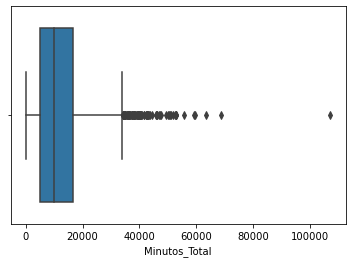

In [22]:
#un pequeño analisis de boxplot para verificar si existen outliers. 
fig = plt.plot(figsize=(28, 4))

sns.boxplot(df['Minutos_Total'].dropna())
plt.show()

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


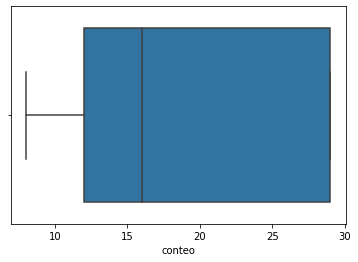

In [23]:
#para obervar la diferencia entre una grafica con outliers y una sin estos graficamos la columna conteo.
fig = plt.plot(figsize=(28, 4))

sns.boxplot(df['conteo'].dropna())
plt.show()

In [24]:
#contabilizamos el numero de observaciones de graduado y no graduado
print(Counter(df['Graduado']))


Counter({'Si': 1280, 'No': 1220})


De toda la informacion que tenemos hasta ahora podemos concluir que tenemos outliers en algunas columnas de datos, no tenemos valores nulos en ninguna de ellas, ya que unimos todas las tablas usando como llaves los studen Ids que ya estan clasificados, y que la variable objetivo está balanceada.

## Pre-procesando el dataset antes de entrenar

In [25]:
# Visualizando los datos faltantes del dataset antes de la primera transformación (df)
print("Valores nulos antes de la transformación DropNA: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos antes de la transformación DropNA: 

studentId                0
reducido                 0
ciclo_x                  0
Graduado                 0
conteo                   0
ciclo_y                  0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
ciclo                    0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
dtype: int64



In [26]:
#de nuevo verificamos que no hayan nulos en el dataframe

In [27]:
df.tail()

,studentId,reducido,ciclo_x,Graduado,conteo,ciclo_y,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,ciclo,Dias_Conectado,Minutos_Promedio,Minutos_Total
2495,89685.0,Estrat. Comercial,2019 - 08,No,17,2019 - 08,79.457000,10.0,0.0,0.0,10.0,2019 - 08,56.0,162.077500,9076.34
2496,77590.0,Crianza Hijos,2019 - 06,Si,12,2019 - 06,88.333571,14.0,0.0,0.0,14.0,2019 - 06,36.0,446.748333,16082.94
2497,57623.0,Mercadotecnia,2018 - 02,Si,29,2018 - 02,85.555556,9.0,0.0,0.0,9.0,2018 - 02,71.0,131.249155,9318.69
2498,50018.0,Lider. Inst. Edu.,2017 - 05,No,27,2017 - 05,0.000000,0.0,10.0,0.0,10.0,2017 - 05,7.0,140.868571,986.08
2499,88250.0,Prof. Deportiva.,2019 - 08,No,14,2019 - 08,78.527273,11.0,0.0,0.0,11.0,2019 - 08,34.0,651.966765,22166.87


In [28]:
df.columns

Index(['studentId', 'reducido', 'ciclo_x', 'Graduado', 'conteo', 'ciclo_y',
       'Calificacion_Promedio', 'Tareas_Puntuales', 'Tareas_No_Entregadas',
       'Tareas_Retrasadas', 'Total_Tareas', 'ciclo', 'Dias_Conectado',
       'Minutos_Promedio', 'Minutos_Total'],
      dtype='object')

Feature: 0, Score: 0.09485
Feature: 1, Score: 0.03785
Feature: 2, Score: 0.19683
Feature: 3, Score: 0.06354
Feature: 4, Score: 0.07642
Feature: 5, Score: 0.01140
Feature: 6, Score: 0.03187
Feature: 7, Score: 0.26552
Feature: 8, Score: 0.09724
Feature: 9, Score: 0.12449


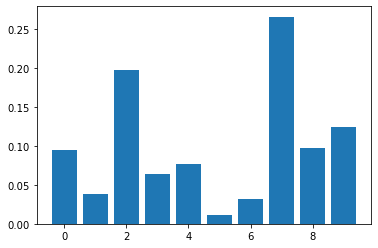

In [29]:
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
#fit the model
model.fit(df[['studentId', 'conteo',
              'Calificacion_Promedio', 'Tareas_Puntuales', 'Tareas_No_Entregadas',
       'Tareas_Retrasadas', 'Total_Tareas', 'Dias_Conectado',
       'Minutos_Promedio', 'Minutos_Total']], df['Graduado'])
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

En las celdas de arriba creamos un modelo sencillo de RandomForestClassifier para a partir de este obtener el metodo feature importance, y asi tener un primer vistazo sobre que features aportan mas al modelo. en este caso dejamos por fuera las features categoricas

In [30]:
#Ahora eliminamos las columnas de reducido, ciclo X y Ciclo Y, que son redundantes y no aportan al modelo.
df2 = df.drop(columns=['reducido','ciclo_x','ciclo_y'], inplace=False)

In [31]:
df2.describe()

,studentId,conteo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,76826.320800,18.519600,71.446212,8.826800,2.165200,0.182800,11.174800,49.085600,259.036880,12190.417404
std,10531.545832,7.366473,28.357020,4.105063,3.795428,0.651732,3.232031,33.072075,145.739734,9760.184061
min,45898.000000,8.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000
25%,71813.250000,12.000000,65.667000,7.000000,0.000000,0.000000,9.000000,23.000000,158.080298,5080.940000
50%,79062.500000,16.000000,82.777083,9.000000,0.000000,0.000000,10.000000,42.000000,231.097917,10019.110000
75%,84517.250000,29.000000,90.748141,11.000000,2.000000,0.000000,13.000000,71.000000,332.742845,16644.392500
max,91346.000000,29.000000,100.000000,29.000000,34.000000,9.000000,34.000000,199.000000,1173.203571,107245.770000


In [32]:
df2.columns

Index(['studentId', 'Graduado', 'conteo', 'Calificacion_Promedio',
       'Tareas_Puntuales', 'Tareas_No_Entregadas', 'Tareas_Retrasadas',
       'Total_Tareas', 'ciclo', 'Dias_Conectado', 'Minutos_Promedio',
       'Minutos_Total'],
      dtype='object')

### Manejando variables Categoricas

Tenemos una variable categorica llamada "ciclo" que puede tener incidencia en el modelo por lo que para poder usarla tendremos que convertirla a valores numericos para esto utilizamos el metodo One Hot Encoding que separa en columnas cada valor categorico diferente y le asigna 1 a la fila que lo contiene y 0 al resto.

In [33]:
# Columnas One-hot-encoding del dataset usando el metodo de Pandas ``get_dummies``
df3 = pd.get_dummies(df2, columns=['ciclo'])
df3.tail()

,studentId,Graduado,conteo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,...,ciclo_2018 - 07,ciclo_2018 - 08,ciclo_2019 - 01,ciclo_2019 - 02,ciclo_2019 - 03,ciclo_2019 - 04,ciclo_2019 - 05,ciclo_2019 - 06,ciclo_2019 - 07,ciclo_2019 - 08
2495,89685.0,No,17,79.457000,10.0,0.0,0.0,10.0,56.0,162.077500,...,0,0,0,0,0,0,0,0,0,1
2496,77590.0,Si,12,88.333571,14.0,0.0,0.0,14.0,36.0,446.748333,...,0,0,0,0,0,0,0,1,0,0
2497,57623.0,Si,29,85.555556,9.0,0.0,0.0,9.0,71.0,131.249155,...,0,0,0,0,0,0,0,0,0,0
2498,50018.0,No,27,0.000000,0.0,10.0,0.0,10.0,7.0,140.868571,...,0,0,0,0,0,0,0,0,0,0
2499,88250.0,No,14,78.527273,11.0,0.0,0.0,11.0,34.0,651.966765,...,0,0,0,0,0,0,0,0,0,1


<hr>

## Entrenando un clasificador basado  en un Árbol de Decisión

### Seleccionando FEATURES y definiendo la variable TARGET

In [34]:
df3.columns

Index(['studentId', 'Graduado', 'conteo', 'Calificacion_Promedio',
       'Tareas_Puntuales', 'Tareas_No_Entregadas', 'Tareas_Retrasadas',
       'Total_Tareas', 'Dias_Conectado', 'Minutos_Promedio', 'Minutos_Total',
       'ciclo_2017 - 03', 'ciclo_2017 - 04', 'ciclo_2017 - 05',
       'ciclo_2017 - 06', 'ciclo_2017 - 07', 'ciclo_2017 - 08',
       'ciclo_2018 - 01', 'ciclo_2018 - 02', 'ciclo_2018 - 03',
       'ciclo_2018 - 04', 'ciclo_2018 - 05', 'ciclo_2018 - 06',
       'ciclo_2018 - 07', 'ciclo_2018 - 08', 'ciclo_2019 - 01',
       'ciclo_2019 - 02', 'ciclo_2019 - 03', 'ciclo_2019 - 04',
       'ciclo_2019 - 05', 'ciclo_2019 - 06', 'ciclo_2019 - 07',
       'ciclo_2019 - 08'],
      dtype='object')

In [35]:
features = df3[
    [
      'studentId', 'conteo', 'Calificacion_Promedio',
       'Tareas_Puntuales', 'Tareas_No_Entregadas', 'Tareas_Retrasadas',
       'Total_Tareas', 'Dias_Conectado', 'Minutos_Promedio', 'Minutos_Total',
       'ciclo_2017 - 03', 'ciclo_2017 - 04', 'ciclo_2017 - 05',
       'ciclo_2017 - 06', 'ciclo_2017 - 07', 'ciclo_2017 - 08',
       'ciclo_2018 - 01', 'ciclo_2018 - 02', 'ciclo_2018 - 03',
       'ciclo_2018 - 04', 'ciclo_2018 - 05', 'ciclo_2018 - 06',
       'ciclo_2018 - 07', 'ciclo_2018 - 08', 'ciclo_2019 - 01',
       'ciclo_2019 - 02', 'ciclo_2019 - 03', 'ciclo_2019 - 04',
       'ciclo_2019 - 05', 'ciclo_2019 - 06', 'ciclo_2019 - 07',
       'ciclo_2019 - 08'
    ]
]
target = df3['Graduado']  

In [36]:
#definimos nuestra transformacion para eliminar los outliers
class OutlierExtractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        print('init')

    def fit(self, X, Y):
        return self

    def transform(self, X, Y):
        X2 = X.to_numpy()
        Y2 = Y.to_numpy()
        iso = IsolationForest(n_estimators=400,contamination=0.3,random_state=42)
        yhat = iso.fit_predict(X)
        mask = yhat != -1
        X2, Y2 = X2[mask, :], Y2[mask]
        print(X2.shape)
        print(Y2.shape)
        X_train2 = pd.DataFrame.from_records(data=X2,columns=X.columns)
        Y_train2 = Y2

        return (X_train2, Y_train2)

In [37]:
#aplicamos la transformación
outlier = OutlierExtractor()
outlier.fit(X=features, Y=target)
features, target = outlier.transform(X=features , Y=target)


init
(1750, 32)
(1750,)


In [38]:
#aplicamos el RobustScaler para estandarizar todas las columnas
sc = RobustScaler()
features = sc.fit_transform(features)

### Dividiendo nuestro dataset en set de Entrenamiento y Pruebas

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

### Entrenando un modelo ``RandomForestClassifier()``

In [41]:
# Método para creacion de modelos basados en arbol de desición
from sklearn.ensemble import RandomForestClassifier


dtc = RandomForestClassifier(n_estimators=800, max_features=6,random_state=42 ).fit(X_train, y_train)

### Haciendo predicciones del Sample Test

In [42]:
y_pred = dtc.predict(X_test)
print(y_pred)

['Si' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'No' 'No' 'No' 'Si' 'No' 'Si'
 'No' 'Si' 'No' 'No' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'Si'
 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'Si'
 'No' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'Si' 'No' 'No' 'No' 'No'
 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'No' 'No'
 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'No'
 'Si' 'Si' 'No' 'Si' 'No' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'Si' 'No' 'Si'
 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'No' 'Si' 'Si'
 'No' 'No' 'No' 'No' 'No' 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'No' 'Si' 'No'
 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si'
 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'No' 'Si' 'No' 'No' 'No' 'Si'
 'No' 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'No' 'No' 'Si'
 'No' 'Si' 'No' 'No' 'No' 'No' 'Si' 'Si' 'No' 'Si' 'No' 'Si' 'Si' 'No'
 'No' 'No' 'Si' 'No' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'No'
 'Si' 

### Analice la calidad del modelo a través de la matriz de confusión

Text(0.5, 15.0, 'Predicted label\n\nAccuracy=0.772\nPrecision=0.807\nRecall=0.819\nF1 Score=0.8127340823970038')

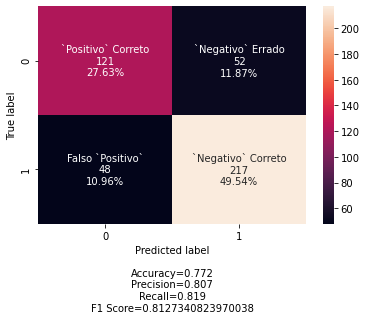

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['`Positivo` Correto', '`Negativo` Errado', 'Falso `Positivo`', '`Negativo` Correto']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score  = 2*precision*recall / (precision + recall)
sns.heatmap(cf_matrix, annot=labels, fmt="")
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score)
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)

Aqui podemos ver los resultados del modelo, donde obtenemos un F1 Score relativamente bueno, en este desafio tambien se iba a calificar basado en esa metrica. 
Como en los otros desafios anteriores la entrega se hacia evaluando el modelo sobre otra tabla de valores proporcionada solo para ser evaluado. se tenia que correr las mismas transformaciones que en la de entrenamiento para adecuarla al modelo y luego anexar las predicciones calculadas.